#### 1. Perkenalan

Nama : Ridha Fuady<br>
Batch : FTDS-011<br>
Dataset : Telco Customer Churn<br>
Objective : Make ANN Learning to Predict Churn

### 2. Import Libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Dense, Activation
import pickle
import ast

### 3. Load Dataset

In [143]:
df_ori = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_ori

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [144]:
df = df_ori.copy() #make a copy from dataset

In [145]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Dari 7043 rows data dan 21 columns mayorutas columns bertype object dengan total 18 columns dan hanya 3 columns yang bertype numeric
* Tidak ada missing value dalam dataset tersebut

In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 4. Exploratory Data Analysis (EDA)

c:\Users\Fuad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Fuad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Fuad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

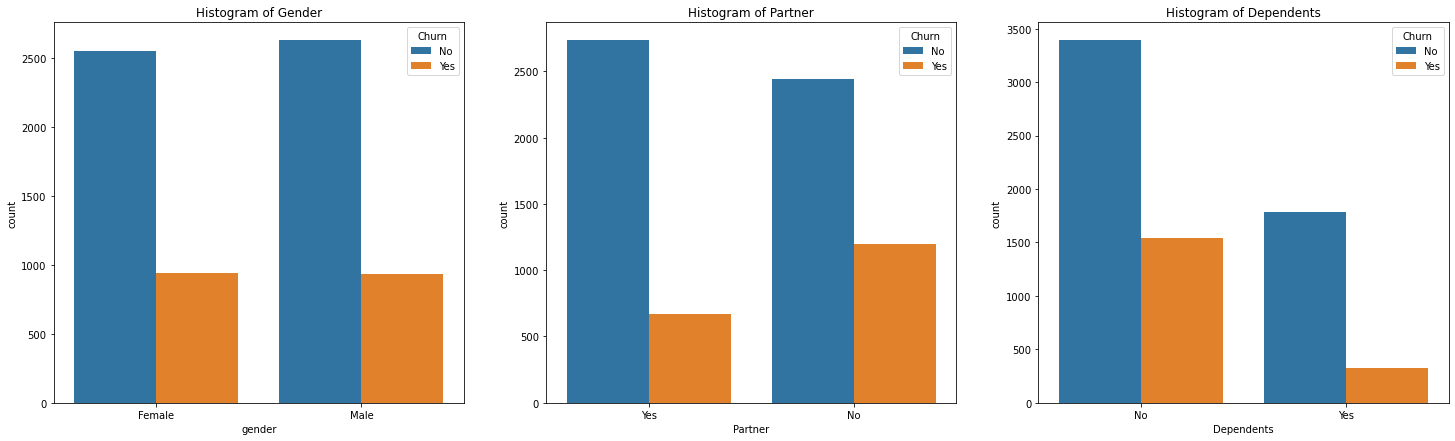

In [148]:
plt.figure(figsize=(25,7))

#looking for the busiest hours
plt.subplot(1,3,1)
sns.countplot("gender", hue = "Churn", data = df)
plt.title("Histogram of Gender")

#looking for the busiest days
plt.subplot(1,3,2)
sns.countplot("Partner", hue = "Churn", data = df)
plt.title("Histogram of Partner")

#looking for the busiest months
plt.subplot(1,3,3)
sns.countplot("Dependents", hue = "Churn", data = df)
plt.title("Histogram of Dependents")

plt.show

* Perbandingan customer male and female tidak jauh berbeda begitu pula antara churn dengan no churn
* Customers yang tidak memiliki partner lebih banyak yang churn dibandingkan yang sudah memiliki partner, hal ini bisa mungkin dikarenakan customer yang masih lajang masih sedikit labil dan ingin mencoba berbagai layanan dari perusahaan lain.
* Customers yang hidup sendiri (no dependents) memiliki churn rate yang lebih tinggi dibandingkan dengan customer yang hidup tidak sendiri (have dependents)

([<matplotlib.patches.Wedge at 0x2576d5e1c70>,
 [Text(0.21138010801255863, 1.0794991662509976, 'No'),
  Text(-0.8436292603186925, -0.7058963600516268, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.11529824073412287, 0.5888177270459987, '43.84%'),
  Text(-0.46016141471928673, -0.38503437820997827, '34.49%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

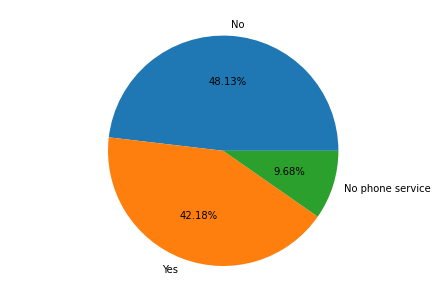

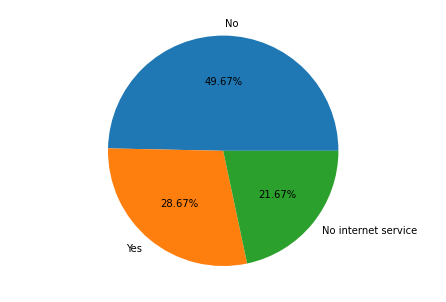

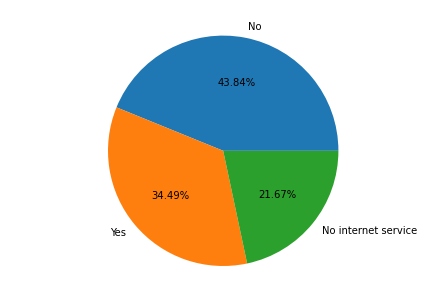

In [149]:
df_multi = df["MultipleLines"].value_counts().rename_axis("MultipleLines").reset_index(name="counts")
multi_labels = df_multi.MultipleLines
multi_values = df_multi.counts

df_security = df["OnlineSecurity"].value_counts().rename_axis("OnlineSecurity").reset_index(name="counts")
security_labels = df_security.OnlineSecurity
security_values = df_security.counts

df_online = df["OnlineBackup"].value_counts().rename_axis("OnlineBackup").reset_index(name="counts")
online_labels = df_online.OnlineBackup
online_values = df_online.counts

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(multi_values, labels=multi_labels, autopct='%1.2f%%')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(security_values, labels=security_labels, autopct='%1.2f%%')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(online_values, labels=online_labels, autopct='%1.2f%%')

* Pada chart pie multiplelines, perbandingan antara customer yang menggunakan fasilitas ini hanya dengan satu telepon dibandingkan dengan beberapa telepon tidak lah terlalu jauh 48% berbanding 42%
* Pada chart pie online security, lebih banyak customer yang tidak menggunakan fasilitas ini, perbandingan jumlah nya hampir 2 kali lipat
* Pada chart online backup, hampir sama dengan online security, mayoritas customer tidak menggunakan fasilitas ini untuk saluran teleponnya

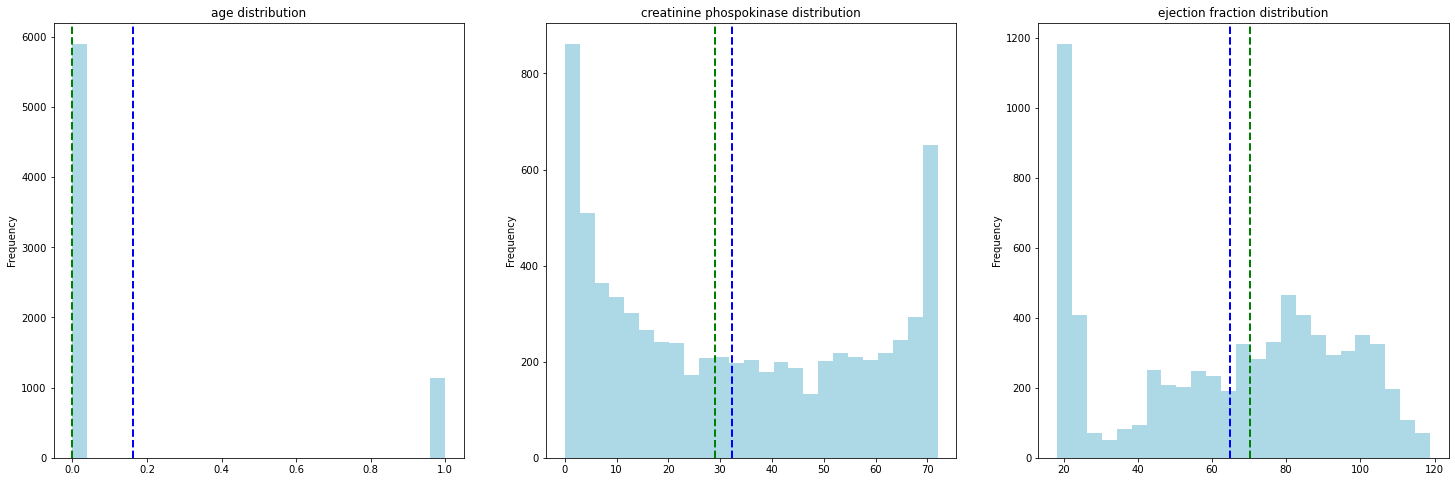

In [150]:
dfsc = df["SeniorCitizen"]
dftenure = df['tenure']
dfmonth = df['MonthlyCharges']

plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
dfsc.plot.hist(title="age distribution", color="lightblue", bins=25)
plt.axvline(dfsc.mean(), color="blue", linestyle="dashed", linewidth=2)
plt.axvline(dfsc.median(), color="green", linestyle="dashed", linewidth=2)

plt.subplot(1,3,2)
dftenure.plot.hist(title="creatinine phospokinase distribution", color="lightblue", bins=25)
plt.axvline(dftenure.mean(), color="blue", linestyle="dashed", linewidth=2)
plt.axvline(dftenure.median(), color="green", linestyle="dashed", linewidth=2)

plt.subplot(1,3,3)
dfmonth.plot.hist(title="ejection fraction distribution", color="lightblue", bins=25)
plt.axvline(dfmonth.mean(), color="blue", linestyle="dashed", linewidth=2)
plt.axvline(dfmonth.median(), color="green", linestyle="dashed", linewidth=2)

* pada chart Senior citizen, lebih didominasi oleh kategori yang bukan senior atau masih muda
* pada chart tenure, customer lebih banyak menggunakan product telepon selama range 0-10 dan 60-72, dengan rata-rata lama penggunaan 32
* customer terendah pada chart tenure berada pada range 40-50
* pada chart monthlycharges, customer lebih banyak mengeluarkan biaya pada range 20-30, dengan rata-rata pengeluaran sebesar 74
* customer terendah pada chart monthly charges berada pada range 30-40 dan 110-120

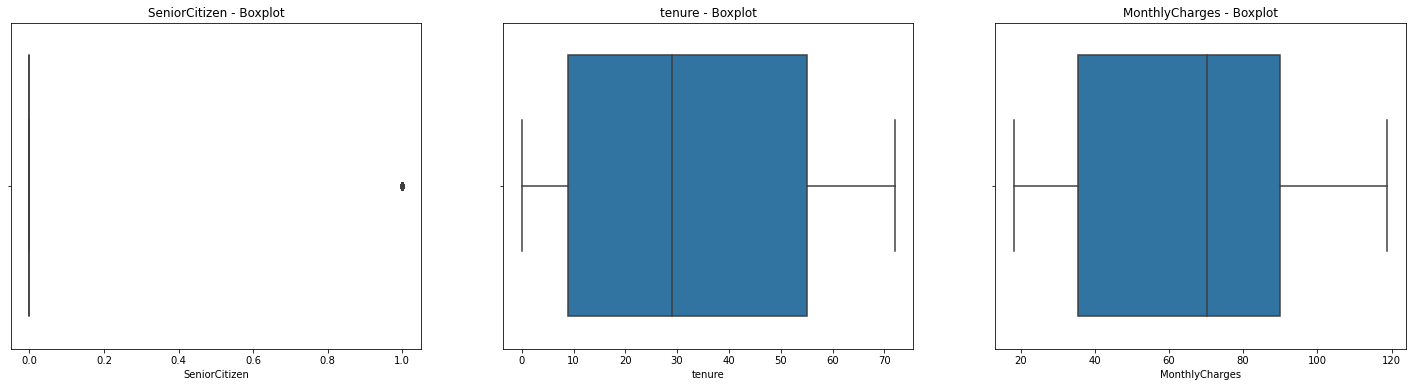

In [151]:
grup1 = ["SeniorCitizen", "tenure", "MonthlyCharges"]
fig1 = plt.figure(figsize=(25,6))
axes = 130 #susunan chart
for num in grup1:
    axes += 1
    fig1.add_subplot(axes) 
    sns.boxplot(data = df, x = num).set_title('%s - Boxplot' % num)
plt.show()

* Tidak terdapat outliers pada column numerical tenure
* Pada column monthlycharges juga sama, tidak memiliki outliers pada columnsnya

<function matplotlib.pyplot.show(close=None, block=None)>

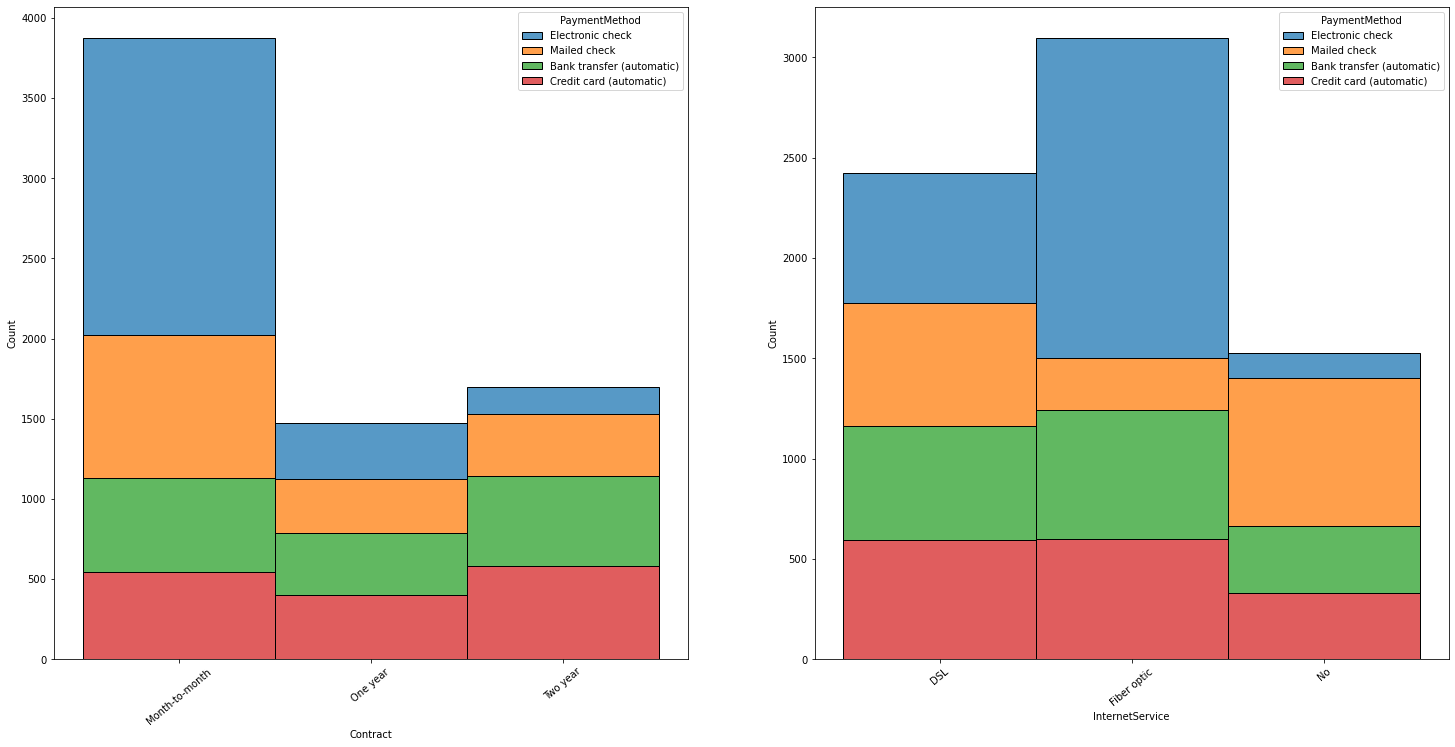

In [152]:
plt.figure(figsize=(25,12))
plt.subplot(1,2,1)
fig2 = sns.histplot(x="Contract", hue="PaymentMethod", data=df, multiple="stack")
plt.setp(fig2.get_xticklabels(), rotation=40)

plt.subplot(1,2,2)
fig3 = sns.histplot(x="InternetService", hue="PaymentMethod", data=df, multiple="stack")
plt.setp(fig3.get_xticklabels(), rotation=40)

plt.show

#### Contract Chart
* month to month contract mendominasi dibandingkan kategori yang lain
* electronic check mendominasi pada month to month saja, sedangkan kategori one year dan two year payment method credit card lebih dominan

#### Internet Service
* kategori fiber optic menjadi yang paling dominan dari kategori internet service yang lain
* electronic check mendominasi pada kategori fiber optic.

### 5. Data Preprocessing

Dikarenakan column total charges ada kesalahan yang dimana seharusnya column tersebut seharusnya float tetapi dataset membaca sebagai string, maka perlu dilakukan perubahan pada data tersebut

In [153]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [154]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Setelah dicek missing values ternyata terdapat 11 missing values, dikarenakan jumlah nya yang sedikit maka saya akan melakukan drop pada rows nya

In [155]:
df = df.dropna()

Dikarenakan ada beberapa column yang berisi no internet service dan no phone service maka saya akan merubah value tersebut menjadi no untuk mengurangi cardinality

In [156]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [157]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [158]:
df['Churn'].replace('No', 0, inplace=True)
df['Churn'].replace('Yes', 1, inplace=True)

In [159]:
#get data for model inference
df_inf = df.sample(10, random_state=1)
df_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1778,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Credit card (automatic),24.75,1859.10,0
5036,1268-ASBGA,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,1
1106,4159-NAAIX,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,0
1665,1219-NNDDO,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,0
927,9625-QSTYE,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,1


In [160]:
#remove inference-set from dataset
df_train_test = df.drop(df_inf.index)
df_train_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [161]:
#reset index to avoid error
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Credit card (automatic),24.75,1859.10,0
1,1268-ASBGA,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,1
2,4159-NAAIX,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,0
3,1219-NNDDO,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,0
4,9625-QSTYE,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,1


Selanjutnya kita akan drop customer ID dikarenakan column tersebut isi datanya merupakan unique value semua, dan customer ID hanyalah sebuah identitas dan tidak akan memiliki hubungan atau korelasi dengan target churn.

In [162]:
#splitting dataset between X (features) and y (target)

X = df_train_test.drop(["customerID", "Churn"], axis = 1)
y = df_train_test["Churn"]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [163]:
#memisahkan data train, val and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.8, random_state=5)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.8, random_state=5)

print("Train Size: ", X_train.shape)
print("Test Size: ", X_test.shape)
print("Val Size: ", X_val.shape)
print("Missing Value in X_train : ", X_train.isnull().sum().sum())
print("Missing Value in X_test : ", X_test.isnull().sum().sum())
print("Missing Value in X_val : ", X_val.isnull().sum().sum())
print("Missing Value in y_train : ", y_train.isnull().sum().sum())
print("Missing Value in y_yrain : ", y_test.isnull().sum().sum())
print("Missing Value in y_val : ", y_val.isnull().sum().sum())

Train Size:  (4493, 19)
Test Size:  (1405, 19)
Val Size:  (1124, 19)
Missing Value in X_train :  0
Missing Value in X_test :  0
Missing Value in X_val :  0
Missing Value in y_train :  0
Missing Value in y_yrain :  0
Missing Value in y_val :  0


### Scaling & Encoding without Pipeline

Disini saya akan melakukan feature scaling kepada numeric features untuk mendapatkan range angka yang sama pada tiap featuresnya, dan saya menggunakan mixmaxscaler karena minmaxscaler untuk data yang terdistribusi tidak normal

In [164]:
#split between numerical columns and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns: ", num_columns)
print("Categorical Columns: ", cat_columns)

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [165]:
#splitting train-set and test-set based on columns type
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#X_val_num = X_val[num_columns]
#X_val_cat = X_val[cat_columns]

In [166]:
#scaling menggunakan minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
#X_val_num_scaled = scaler.transform(X_val_num)

#X_train_num_scaled

In [167]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
#X_val_cat_encoded = encoder.transform(X_val_cat)

#X_train_cat_encoded

In [168]:
#concate columns

X_train_final2 = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final2 = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

#X_train_final

In [169]:
#make new dataset agar rapi
X_train_final_df= pd.DataFrame(X_train_final2, columns=[num_columns+cat_columns])
X_train_final_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.887324,0.012935,0.141137,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
1,0.0,0.000000,0.122388,0.001358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.915493,0.905473,0.816268,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0
3,1.0,0.140845,0.765174,0.113114,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.112676,0.258209,0.044438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,0.0,0.718310,0.654726,0.497825,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4489,1.0,0.014085,0.263184,0.008655,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4490,0.0,0.676056,0.607463,0.448788,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
4491,0.0,0.000000,0.015920,0.000121,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [170]:
model_rndm = RandomForestClassifier(random_state=3)
model_rndm.fit(X_train_final2, y_train)
model_rndm.feature_importances_

array([0.02220902, 0.16284318, 0.19381514, 0.19371524, 0.02910061,
       0.02337599, 0.02033722, 0.00622063, 0.02022438, 0.04550714,
       0.02175734, 0.02154534, 0.01927109, 0.02174554, 0.01734494,
       0.01832538, 0.0822062 , 0.02843342, 0.0520222 ])

Dari sini dapat diketahui bahwa features yang paling berpengaruh atau yang memiliki korelasi paling kuat adalah 'tenure', 'monthlycharges', 'totalcharges', 'internetservice', 'paymentmethod'

### Scaling & Encoding with Pipeline and Input Pipeline Tensor

In [171]:
#split between numerical columns and categorical columns
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['InternetService', 'PaymentMethod']

print("Numerical Columns: ", num_col)
print("Categorical Columns: ", cat_col)

Numerical Columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns:  ['InternetService', 'PaymentMethod']


In [172]:
num_pipeline = make_pipeline(MinMaxScaler()) #scaling numerical features
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore')) #encode categorical features

#merge scaling and encode
prep_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)])

In [173]:
X_train_final = prep_pipeline.fit_transform(X_train)
X_val_final = prep_pipeline.transform(X_val)
X_test_final = prep_pipeline.transform(X_test)

In [174]:
train_data = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(10000).batch(30)
val_data = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).shuffle(10000).batch(30)

### 6. Model Definition Sequence API

In [175]:
model_seq = keras.Sequential([
        keras.layers.Dense(20, input_shape=(10,), activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
])

In [176]:
model_seq.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### 7. Model Training Sequence API

In [177]:
history_seq = model_seq.fit(train_data, epochs=30,
                            validation_data=(val_data), verbose=1)

Epoch 1/30
150/150 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6664 - val_loss: 0.5237 - val_accuracy: 0.7536
Epoch 2/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7881 - val_loss: 0.4826 - val_accuracy: 0.7625
Epoch 3/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7921 - val_loss: 0.4602 - val_accuracy: 0.7740
Epoch 4/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8017 - val_loss: 0.4530 - val_accuracy: 0.7811
Epoch 5/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8026 - val_loss: 0.4496 - val_accuracy: 0.7838
Epoch 6/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8053 - val_loss: 0.4476 - val_accuracy: 0.7785
Epoch 7/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8039 - val_loss: 0.4469 - val_accuracy: 0.7829
Epoch 

### 8. Model Evaluation Sequence API

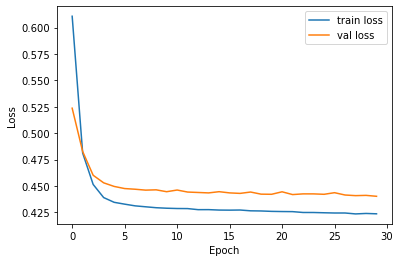

In [178]:
fig, ax = plt.subplots()
ax.plot(range(30),history_seq.history['loss'],label='train loss')
ax.plot(range(30),history_seq.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

Setelah dievaluasi hasil model menggunakan Sequence API dengan parameter standar mendapatkan hasil yang cukup goodfit dimana train_loss dengan val_loss tidak terlalu jauh

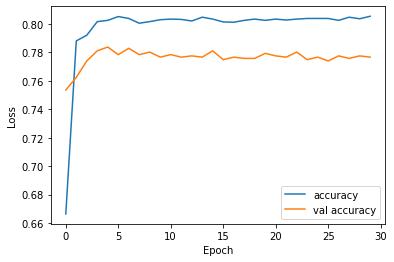

In [179]:
fig, ax = plt.subplots()
ax.plot(range(30),history_seq.history['accuracy'],label='accuracy')
ax.plot(range(30),history_seq.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

Jika kita lihat pada grafik accuracy nya hasilnya tidak terlalu berbeda jauh hanya sebesar 0.2

In [180]:
class_names = ["No", 'Yes']

In [181]:
model_seq.evaluate(X_test_final, y_test)

44/44 [==============================] - 0s 704us/step - loss: 0.4445 - accuracy: 0.7900


[0.444542795419693, 0.790035605430603]

### 9. Predict Sequence API

In [182]:
X_new_seq = X_test_final[:10]
y_proba_seq = model_seq.predict(X_new_seq)
y_proba_seq.round(2)

1/1 [==============================] - 0s 30ms/step


array([[0.85, 0.54],
       [0.97, 0.3 ],
       [0.74, 0.63],
       [0.53, 0.71],
       [0.67, 0.64],
       [0.5 , 0.73],
       [0.68, 0.64],
       [0.82, 0.48],
       [0.86, 0.59],
       [0.88, 0.57]], dtype=float32)

In [183]:
y_pred_seq = np.argmax(model_seq.predict(X_new_seq), axis=-1)
y_pred_seq

1/1 [==============================] - 0s 13ms/step


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

Berdasarkan hasil probabilitas, banyak class 0 yang mendapatkan score lebih tinggi dibanding class 1

In [184]:
np.array(class_names)[y_pred_seq]

array(['No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [185]:
y_new = y_test[:10]
y_new

4381    1
2446    0
6582    1
64      1
4841    1
5671    0
1445    0
3140    0
5890    1
1891    0
Name: Churn, dtype: int64

Berdasarkan 

### 6. Model Definition Function API

In [186]:
inputs = tf.keras.Input(shape=(10,), name="digits")
hidden_1 = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
hidden_2 = tf.keras.layers.Dense(64, activation="relu", name="dense_2")(hidden_1)
outputs = tf.keras.layers.Dense(2, activation="softmax", name="predictions")(hidden_2)

model_func = tf.keras.Model(inputs=inputs, outputs=outputs)

In [187]:
model_func.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 7. Model Training Function API

In [188]:
history_func = model_func.fit(train_data, epochs=30,
                                validation_data=val_data, verbose=1)

Epoch 1/30
150/150 [==============================] - 1s 2ms/step - loss: 0.4689 - accuracy: 0.7777 - val_loss: 0.4528 - val_accuracy: 0.7696
Epoch 2/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7941 - val_loss: 0.4497 - val_accuracy: 0.7767
Epoch 3/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7959 - val_loss: 0.4454 - val_accuracy: 0.7794
Epoch 4/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8010 - val_loss: 0.4451 - val_accuracy: 0.7749
Epoch 5/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8028 - val_loss: 0.4445 - val_accuracy: 0.7758
Epoch 6/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8017 - val_loss: 0.4505 - val_accuracy: 0.7776
Epoch 7/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8004 - val_loss: 0.4424 - val_accuracy: 0.7794
Epoch 

### 8. Model Evaluation Function API

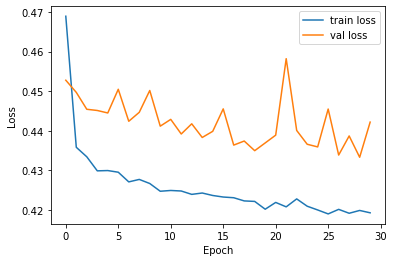

In [189]:
fig, ax = plt.subplots()
ax.plot(range(30),history_func.history['loss'],label='train loss')
ax.plot(range(30),history_func.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

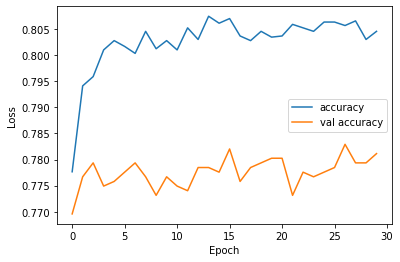

In [190]:
fig, ax = plt.subplots()
ax.plot(range(30),history_func.history['accuracy'],label='accuracy')
ax.plot(range(30),history_func.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

* Setelah dievaluasi model menggunakan Function API hasilnya tidak jauh berbeda dengan Sequence API yaitu cukup goodfit dimana train loss tidak jauh berbeda daripada val loss nya.
* Jika kita bandingkan sequence API dengan function API terlihat ada perbedaan dalam penurunan train loss dan val loss, sequence API lebih konsisten terjadi penurunan dan val_loss nya tidak terjadi exploding peak yang tajam. Berbeda dengan function API dimana train loss terlihat stagnan walaupun tidak terjadi vanishing gradient, dan val loss nya mengalami exploding peak yang tajam dan berulang kali
* Sedangkan pada grafik accuracy terlihat bahwa perbedaan accuracy juga tidak berbeda jauh hanya sekitar 0.2
* Kesimpulan yang saya dapat dari kedua model ini, model sequence lebih baik jika dibandingkan dengan model Function sehingga saya akan melakukan tuning pada model sequence agar mendapatkan hasil yang lebih baik

In [191]:
model_func.evaluate(X_test_final, y_test)

44/44 [==============================] - 0s 719us/step - loss: 0.4505 - accuracy: 0.7972


[0.45045480132102966, 0.7971529960632324]

### 9. Predict Data Function API

In [192]:
X_new_func = X_test_final[:10]
y_proba_func = model_func.predict(X_new_func)
y_proba_func.round(2)

1/1 [==============================] - 0s 60ms/step


array([[0.87, 0.13],
       [0.99, 0.01],
       [0.58, 0.42],
       [0.24, 0.76],
       [0.55, 0.45],
       [0.23, 0.77],
       [0.54, 0.46],
       [0.85, 0.15],
       [0.73, 0.27],
       [0.89, 0.11]], dtype=float32)

Dari hasil probabilitas dapat kita ketahui nilai class 0 masih mendominasi dibandingkan probabilitas dari class 1

In [193]:
y_pred_func = np.argmax(model_func.predict(X_new_func), axis=-1)
y_pred_func

1/1 [==============================] - 0s 14ms/step


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [194]:
np.array(class_names)[y_pred_func]

array(['No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [195]:
y_new = y_test[:10]
y_new

4381    1
2446    0
6582    1
64      1
4841    1
5671    0
1445    0
3140    0
5890    1
1891    0
Name: Churn, dtype: int64

Dari hasil perbandingan dengan nilai asli dapat diketahui hanya 60% yang dapat di predict benar dari model dengan function API

### 6. Model Definition Sequence API with Tuning

In [196]:
model_final = tf.keras.models.Sequential() #declare model

model_final.add(tf.keras.layers.Dense(64,input_shape=(10,), kernel_initializer=tf.keras.initializers.GlorotUniform(), activation='tanh')) #input layer

model_final.add(tf.keras.layers.Dense(32, activation='relu')) #hideen layer 1  

model_final.add(tf.keras.layers.Dense(16, activation='relu')) #hidden layer 2

model_final.add(tf.keras.layers.Dense(8, activation='relu')) #hidden layer 3

model_final.add(tf.keras.layers.Dense(2, activation='softmax')) #output layer

In [197]:
model_final.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.15, clipvalue=1.0), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [198]:
model_final.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                704       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### 7. Model Training Sequence API with Tuning

In [199]:
history_final = model_final.fit(train_data, epochs=200,
                            validation_data=(val_data), verbose=1)

Epoch 1/200
150/150 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7781 - val_loss: 0.4505 - val_accuracy: 0.7714
Epoch 2/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7981 - val_loss: 0.4540 - val_accuracy: 0.7811
Epoch 3/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7957 - val_loss: 0.4444 - val_accuracy: 0.7785
Epoch 4/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7984 - val_loss: 0.4652 - val_accuracy: 0.7776
Epoch 5/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7984 - val_loss: 0.4540 - val_accuracy: 0.7731
Epoch 6/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8019 - val_loss: 0.4632 - val_accuracy: 0.7651
Epoch 7/200
150/150 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8015 - val_loss: 0.4436 - val_accuracy: 0.7811

### 8. Model Evaluation Sequence API with Tuning

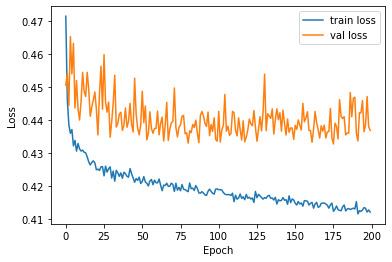

In [200]:
fig, ax = plt.subplots()
ax.plot(range(200),history_final.history['loss'],label='train loss')
ax.plot(range(200),history_final.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

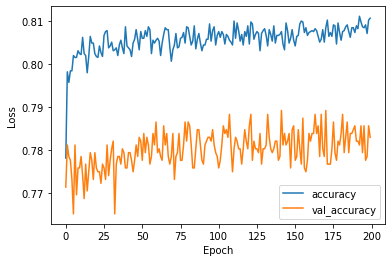

In [201]:
fig, ax = plt.subplots()
ax.plot(range(200),history_final.history['accuracy'],label='accuracy')
ax.plot(range(200),history_final.history['val_accuracy'],label='val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [202]:
model_final.evaluate(X_test_final, y_test)

44/44 [==============================] - 0s 741us/step - loss: 0.4471 - accuracy: 0.7886


[0.44709572196006775, 0.7886121273040771]

### 9. Predict with Data Test

In [203]:
X_new_final = X_test_final[:10]
y_proba_final = model_final.predict(X_new_final)
y_proba_final.round(2)

1/1 [==============================] - 0s 42ms/step


array([[0.81, 0.19],
       [0.98, 0.02],
       [0.57, 0.43],
       [0.31, 0.69],
       [0.54, 0.46],
       [0.34, 0.66],
       [0.51, 0.49],
       [0.87, 0.13],
       [0.68, 0.32],
       [0.91, 0.09]], dtype=float32)

Dapat dilihat dari hasil probabilitas per class nya, dari class 0 dan class 1 peluang class 0 lebih tinggi dibanding class 1

In [204]:
y_pred_final = np.argmax(model_final.predict(X_new_final), axis=-1)
y_pred_final

1/1 [==============================] - 0s 12ms/step


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [205]:
np.array(class_names)[y_pred_final]

array(['No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [206]:
y_new = y_test[:10]
y_new

4381    1
2446    0
6582    1
64      1
4841    1
5671    0
1445    0
3140    0
5890    1
1891    0
Name: Churn, dtype: int64

* Berdasarkan hasil prediksi mendapatkan hasil yang kurang memuaskan dimana hasil yang dapat diprediksi benar hanyalah sebesar 60% dan hasil ini tidak terlalu baik. Jika diperhatikan ada kemungkinan hasil yang buruk ini disebabkan oleh data awal yang imbalance. Saran untuk selanjutnya akan lebih baik jika sebelum memulai proses modeling dilakukan proses balancing data dengan SMOTENC untuk mendapatkan sample yang seimbang antara class 0 dan class 1.

* Dikarenakan hasil tuning yang saya lakukan tidak terlalu memuaskan maka saya akan kemabali menggunakan model dengan sequence API tanpa menggunakan tuning untuk dimasukan kedalam deployment

### Predict with Inference Data

### 10. Model Saving

In [ ]:
with open("final_pipe.pkl", "wb") as pipe_file:
    pickle.dump(prep_pipeline, pipe_file)

model_seq.save("my_keras_model.h5")